## Azure notebook Setup

In [1]:
#A class attribute that provides access to the TabularDatasetFactory methods for creating new TabularDataset objects. 
#Usage: Dataset.Tabular.from_delimited_files().
from azureml.core import Workspace, Dataset

subscription_id = 'bcfe0c62-8ebe-4df0-a46d-1efcf8739a5b' #check the launch studio there will get this id
resource_group = 'VChamp-Team3' # resource group name
workspace_name = 'vchamp-team3' # worksapce name


# storage account : Algorithmia, Resource group: VChamp-Team3 and workspace: vchamp-team3.
#Constructor
workspace = Workspace(subscription_id, resource_group, workspace_name)

In [2]:
#['data_team3_synthetic_train']
datastore = workspace.datastores['data_team3_synthetic_train']

In [3]:
#from_delimited_files (Create a TabularDataset to represent tabular data in delimited files (e.g. CSV and TSV).

dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'inpatient_location_train.csv')])

# preview the first 3 rows of the dataset
# dataset.to_pandas_dataframe()

In [4]:
#Converting the dataset into data frame(default as dataset in Azure, thus we must convert the needed formate)
inpatient_location_train_data= dataset.to_pandas_dataframe()

In [5]:
type(inpatient_location_train_data)

pandas.core.frame.DataFrame

In [6]:
inpatient_location_train_data.head()

,Column1,Internalpatientid,Age at location,Location start date,Location end date,Service,Died at location,State
0,0,100005,66.405085,2002-09-09 01:24:31,2002-09-12 01:00:40,MEDICINE,False,Oklahoma
1,1,100008,70.233217,2019-06-04 05:46:59,2019-06-05 10:07:31,SURGERY,False,North Carolina
2,5,100015,55.357221,2001-04-01 01:32:23,2001-04-02 20:04:22,MEDICINE,False,Rhode Island
3,6,100015,55.684944,2001-07-29 20:19:52,2001-07-30 22:42:13,MEDICINE,False,Rhode Island
4,7,100020,60.574319,2022-04-05 21:55:19,NaT,SURGERY,False,Pennsylvania


----
# Inpatient_Location
----

### **Dataset Description:**

- **Internalpatientid:** This column contains unique identifiers for each patient. It is likely used to track and distinguish individual patients within the dataset.

- **Age at location:** This column represents the age of the patient at the specific location mentioned in the dataset. It provides information about the age of the patient during a particular medical event or stay.

- **Location start date:** This column indicates the date and time when the patient started their stay or received services at a specific location. The format appears to be hours:minutes.seconds.

- **Location end date:** This column indicates the date and time when the patient's stay or services at a specific location ended. It follows the same format as the location start date column.

- **Service:** This column describes the type of medical service or department the patient received care from. It provides information about the specific area of healthcare the patient was involved with, such as Medicine, Surgery, NHCU (which may refer to a specific unit or department), etc.

- **Died at location:** This column indicates whether the patient died while at the specific location mentioned in the dataset. The "NaN" values suggest that no death was recorded for these patients at the mentioned locations.

- **State:** This column specifies the state in which the location is located. It provides information about the geographical location of the medical facility or site where the patient received care.

---
## **Content:**
Reference: Explanation of Features
- 1. Importing Libraries
- 2. Data Exploration
- 3. Checking for Missing Values
- 4. Exploring Numerical Variables
- 5. Exploring Object-Type Features
- 6. Age-Based Bucketing for Service Aggregation and Grouping
     - Checking Missing Values for Grouped columns
- 7. Loading the Death file
     - Merging Service Grouped Columns and Death File with Left join on using Internalpatientid
     - Checking Missing Values for Death patients
- 8. Bivariate Analysis for Each Column vs. Death
- 9. Observations
---

**Reference: Explanation of Features**

### Service

- **MEDICINE:** This refers to the branch of healthcare focused on the diagnosis, treatment, and prevention of diseases and illnesses using non-surgical methods. It involves prescribing medications, therapies, lifestyle modifications, and other non-invasive interventions.

- **SURGERY:** Surgery involves medical procedures performed by a surgeon to treat diseases, injuries, or conditions by manually altering or repairing body tissues or organs. It often involves making incisions and using surgical instruments to access and correct specific issues.

- **NHCU (Nursing Home Care Unit):** NHCU typically refers to a specialized unit within a healthcare facility, such as a hospital or nursing home, that provides care and support for individuals who require extended nursing care due to chronic illness, disability, or age-related conditions.

- **NON-COUNT:** In the given context, "NON-COUNT" is not a specific medical term. It could potentially refer to a category that does not involve a specific medical countable service or is not categorized under any specific medical department.

- **PSYCHIATRY:** Psychiatry is a branch of medicine that deals with the diagnosis, treatment, and management of mental health disorders. Psychiatrists assess mental health conditions, prescribe medications, and provide psychotherapy to help individuals with various mental health issues.

- **DOMICILIARY:** Domiciliary care refers to healthcare services provided in a patient's own home rather than in a healthcare facility. It involves medical professionals or caregivers delivering medical treatments, nursing care, or support services in a home setting.

- **BLIND REHAB:** Blind rehabilitation focuses on providing services and support to individuals who are blind or visually impaired. It may include orientation and mobility training, adaptive skills training, and assistive technology to help individuals live independently and navigate their environment.

- **INTERMEDIATE MED:** Intermediate medicine likely refers to a level of care that falls between acute (hospital-based) care and primary care. It may involve specialized medical services provided in outpatient clinics or community healthcare settings.

- **SPINAL CORD INJURY:** Spinal cord injury refers to damage to the spinal cord, often resulting in loss of sensation, movement, or other bodily functions. It can lead to various degrees of paralysis or impairment, depending on the location and severity of the injury.

- **REHAB MEDICINE:** Rehabilitation medicine, also known as physical medicine and rehabilitation (PM&R), focuses on restoring functional abilities and improving quality of life for individuals with disabilities caused by injury, illness, or chronic conditions. It involves a multidisciplinary approach that may include physical therapy, occupational therapy, and other rehabilitation techniques.

- **NEUROLOGY:** Neurology is a branch of medicine that deals with the diagnosis and treatment of disorders related to the nervous system, including the brain, spinal cord, and nerves. Neurologists diagnose and manage conditions such as epilepsy, stroke, multiple sclerosis, and neurodegenerative disorders.

## 1. Importing Libraries

In [7]:
# Importing essential libraries
import pandas as pd        # Library for data manipulation and analysis
import numpy as np         # Library for mathematical operations
import matplotlib.pyplot as plt     # Library for data visualization
import seaborn as sns       # Library for advanced data visualization

## 2. Data Exploration

In [8]:
# changing variable name for dataframe
df = inpatient_location_train_data

In [9]:
# Display the first few rows of a DataFrame
df.head()

,Column1,Internalpatientid,Age at location,Location start date,Location end date,Service,Died at location,State
0,0,100005,66.405085,2002-09-09 01:24:31,2002-09-12 01:00:40,MEDICINE,False,Oklahoma
1,1,100008,70.233217,2019-06-04 05:46:59,2019-06-05 10:07:31,SURGERY,False,North Carolina
2,5,100015,55.357221,2001-04-01 01:32:23,2001-04-02 20:04:22,MEDICINE,False,Rhode Island
3,6,100015,55.684944,2001-07-29 20:19:52,2001-07-30 22:42:13,MEDICINE,False,Rhode Island
4,7,100020,60.574319,2022-04-05 21:55:19,NaT,SURGERY,False,Pennsylvania


In [10]:
# Shape of the dataset
df.shape

num_rows = df.shape[0]  # Number of rows
num_cols = df.shape[1]  # Number of columns

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 850037
Number of columns: 8


In [11]:
# Get the number of unique values in the 'Internalpatientid' column
df['Internalpatientid'].nunique()

84523

In [12]:
# Dropping unnammed column
df = df.drop(df.columns[0], axis=1)

In [13]:
# Display the concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850037 entries, 0 to 850036
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Internalpatientid    850037 non-null  int64         
 1   Age at location      850037 non-null  float64       
 2   Location start date  850037 non-null  datetime64[ns]
 3   Location end date    830823 non-null  datetime64[ns]
 4   Service              850037 non-null  object        
 5   Died at location     850037 non-null  bool          
 6   State                850037 non-null  object        
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 39.7+ MB


- The 'Internalpatientid' column contains integer values and the columns for 'Age at location' in float format, while the rest of the features are in object format.

## 3. Checking for Missing Values

In [14]:
# List comprehension to find columns with missing values
[features for features in df.columns if df[features].isnull().sum()>0]

['Location end date']

In [15]:
# Count the number of missing values in each column
df.isnull().sum()

Internalpatientid          0
Age at location            0
Location start date        0
Location end date      19214
Service                    0
Died at location           0
State                      0
dtype: int64

- The dataset has some missing values in ‘Location end date’ has few missing values.

## 4. Exploring Numerical Variables

### Age at Location

In [19]:
# Generate descriptive statistics of the DataFrame
df.describe()

,Internalpatientid,Age at location
count,850037.000000,850037.000000
mean,84923.822968,69.042214
std,48899.398677,11.892022
min,1.000000,20.399133
25%,42392.000000,60.689540
50%,85578.000000,68.986197
75%,127134.000000,77.730811
max,169064.000000,109.224928


In [20]:
# Calculate descriptive statistics for the dataframe
description = df.describe()
min_age = description.loc['min', 'Age at location']  # Extract the minimum age value
max_age = description.loc['max', 'Age at location']  # Extract the maximum age value
mean = description.loc['mean', 'Age at location']  # Extract the mean age value
count = description.loc['count', 'Age at location']  # Extract the count of age values

print("Age at location:") 
print("Mean age: {:.2f}".format(mean))  # Print the mean age formatted with two decimal places
print("Minimum Age: {:.2f}".format(min_age))  # Print the minimum age formatted with two decimal places
print("Maximum Age: {:.2f}".format(max_age))  # Print the maximum age formatted with two decimal places
print("Count:", count)

Age at location:
Mean age: 69.04
Minimum Age: 20.40
Maximum Age: 109.22
Count: 850037.0


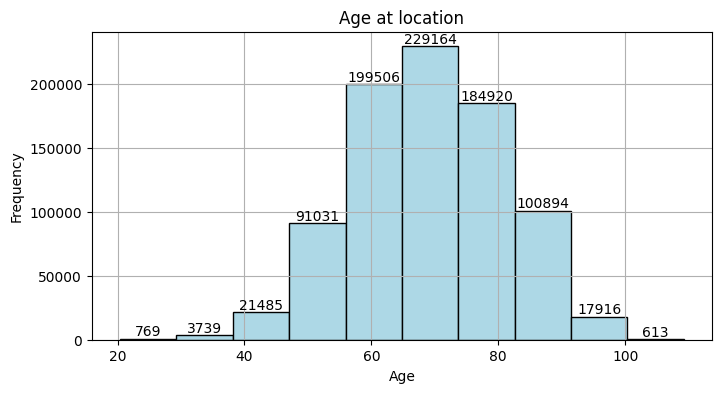

In [21]:
# Assuming you have an 'Age' column in your DataFrame
age = df['Age at location']

# Create a histogram
plt.figure(figsize=(8, 4))
hist = plt.hist(age, bins=10, edgecolor='black', color='lightblue')  # Adjust the number of bins as needed

# Add x-bar values to each bar with adjusted spacing
for i in range(len(hist[0])):
    plt.text(hist[1][i] + (hist[1][i+1] - hist[1][i])/2, hist[0][i] + 10, str(int(hist[0][i])), ha='center', va='bottom', color='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age at location')
plt.grid(True)  # Add grid lines
plt.show()

- The mean age at location is approximately 69 years old, which suggests that the majority of patients are elderly. 
- The standard deviation of the age column is approximately 12 years, indicating that there is a significant variation in age among the patients. 
- The minimum age at location is 20 years old, while the maximum is 109 years old, highlighting the wide range of ages represented in the dataset. 
- The quartile values also show that 50% of the patients locatted were between 60 and 77 years old.

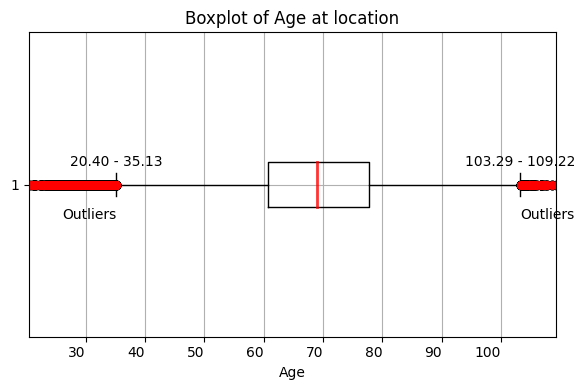

In [22]:
# Assuming you have an 'Age' column in your DataFrame
age = df['Age at location']

# Calculate outliers
q1 = np.percentile(age, 25)
q3 = np.percentile(age, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = age[(age < lower_bound) | (age > upper_bound)]

# Create a boxplot
plt.figure(figsize=(6, 4))
boxplot = plt.boxplot(age, vert=False)

# Plot outliers separately
plt.plot(outliers, [1] * len(outliers), 'ro', markersize=5)

plt.xlabel('Age')
plt.title('Boxplot of Age at location')
plt.grid(True)  # Add grid lines

# Set the x-axis limits and ticks
plt.xlim([min(age), max(age)])
plt.xticks(ha='right')

# Annotate the start and end of outlier range on both sides
plt.text(lower_bound, 1.05, f'{min(age):.2f} - {lower_bound:.2f}', ha='center', va='bottom', color='black')
plt.text(upper_bound, 1.05, f'{upper_bound:.2f} - {max(age):.2f}', ha='center', va='bottom', color='black')

# Annotate the outlier range on the x-axis
plt.text(lower_bound, 0.9, 'Outliers', ha='right', va='center')
plt.text(upper_bound, 0.9, 'Outliers', ha='left', va='center')

# Rotate the image
for box in boxplot['medians']:
    box.set_color('red')  # Set median line color
    box.set_linewidth(2)  # Set median line width
    box.set_alpha(0.8)  # Set median line transparency

plt.tight_layout()  # Adjust spacing between elements
plt.show()

**Outlier Ages:** There are two ranges of outlier ages in the dataset. One range is between 20 and 35, and the other range is between 103 and 109.

---

## 5. Exploring Object type features

In [23]:
# descriptive statistics for the columns of object type 
df.describe(include=['object'])

,Service,State
count,850037,850037
unique,14,50
top,MEDICINE,California
freq,477243,74484


The dataset has Location start date and Location end date here we can calculate how many days they took the treatment. might be helpful for the future purpose.

### Service	(14)

In [24]:
df['Service'].value_counts()

MEDICINE                    477243
SURGERY                     132110
NON-COUNT                    74145
NHCU                         72722
PSYCHIATRY                   34505
DOMICILIARY                  33405
INTERMEDIATE MED              9230
SPINAL CORD INJURY            5247
REHAB MEDICINE                3863
NEUROLOGY                     3577
BLIND REHAB                   3450
(Censored)                     318
Not specified                  180
Not specified (no value)        42
Name: Service, dtype: int64

- Each variable represents a **particular treating service or ward** where patients with specific medical conditions are admitted and treated. 
- For example, Medicine refers to the ward where patients with internal medicine conditions are treated, Surgery refers to the ward where patients undergoing surgeries are admitted and treated, Spinal Cord Injury refers to the ward where patients with nontraumatic spinal cord injuries are admitted and treated, and so on. 
- The **non-count** variable probably refers to patients who are **not admitted to any of the specific wards** or specialties mentioned.

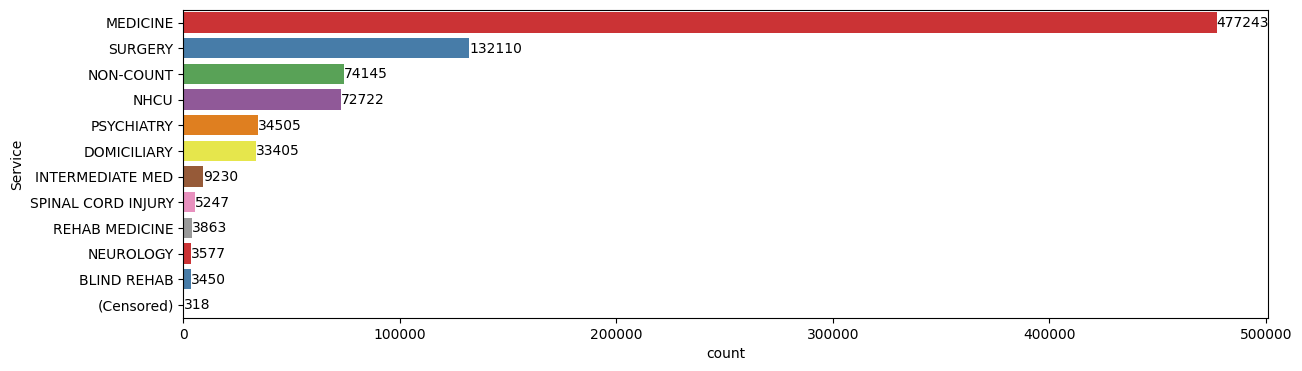

In [25]:
# Generate a frequency table of the categorical variable
freq_table = df['Service'].value_counts()

# Set the figure size
plt.figure(figsize=(14, 4))  # Adjust the width and height as needed

# Define a custom color palette with different colors for each category
custom_palette = sns.color_palette("Set1", n_colors=len(freq_table))

# Plot the frequency table using Seaborn's countplot function with the custom color palette
ax = sns.countplot(y='Service', data=df, order=freq_table.index[:12], palette=custom_palette)

# Add count labels to the bars
for i, count in enumerate(freq_table[:12]):
    ax.text(count, i, str(count), va='center')

# Display the plot
plt.show()

- There were 14 different admitting unit services and different discharging unit services. 
- The most common service was Medicine (477243 occurrences).

### Died at location

In [26]:
df['Died at location'].value_counts()

False    837807
True      12230
Name: Died at location, dtype: int64

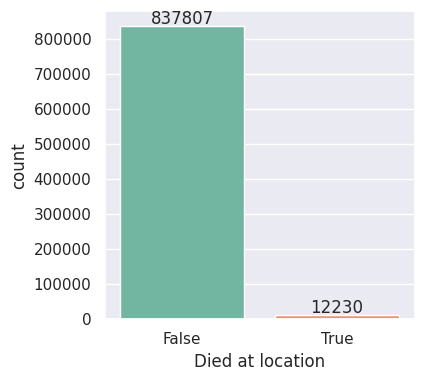

In [27]:
sns.set(style="darkgrid")

# Set a smaller figure size
plt.figure(figsize=(4, 4))

# Specify a color palette
colors = sns.color_palette('Set2')  # You can choose any palette you prefer

ax = sns.countplot(x='Died at location', data=df, palette=colors)

# Rotate x-axis labels vertically
ax.set_xticklabels(ax.get_xticklabels())

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

- The total records, 12,230 patients have the value "Yes" in the "Died at location" column, while the majority of the patients, 837,807 in total, have the value "No". 

### State

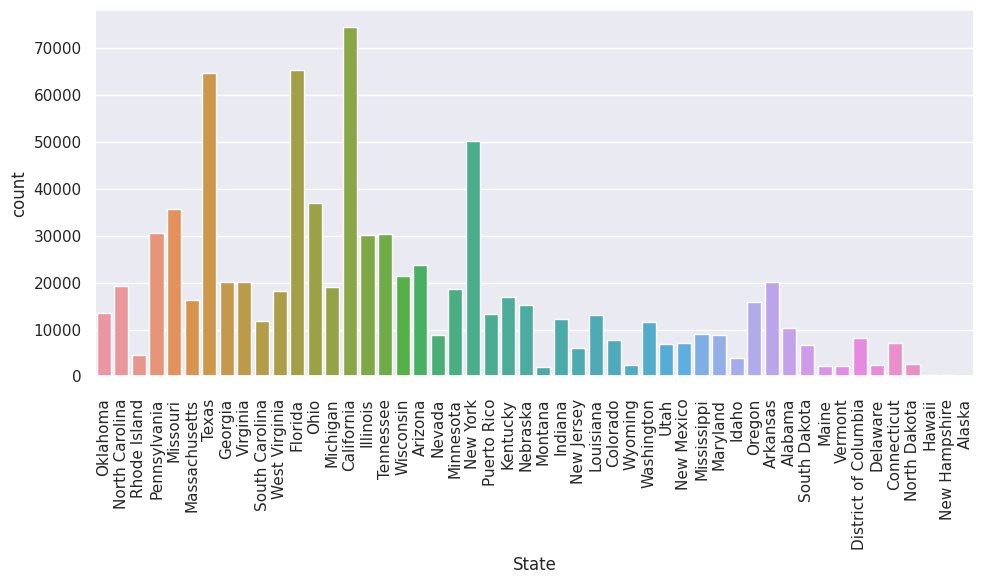

In [28]:
# Increase the figure size
plt.figure(figsize=(10, 6))

sns.set(style="darkgrid")
ax = sns.countplot(x='State', data=df)

# Rotate x-axis labels vertically
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust spacing
ax.tick_params(axis='x', which='major', pad=10)

plt.tight_layout()
plt.show()

- The majority of patients were from **California,** with a total of **74484 patients.** The dataset also includes a breakdown of patients by state.
---

### Compare Inpatient Admission and Inpatient Location dataset’s ‘Service’ related column:

Example1: 

**Internalpatientid = 10469**

**Dataset 1: Inpatient Admission**

- Age at admission - 52.55060435, 63.40565401, 67.52463929
- Admitting unit Service - MEDICINE, NEUROLOGY, PSYCHIATRY
- Discharging unit Service - MEDICINE, NEUROLOGY, PSYCHIATRY

**Dataset 2: Inpatient Location**

- Age at location - 52.55060435, 67.52463929, 63.40565401
- Service - MEDICINE, PSYCHIATRY, NEUROLOGY

---

Example2: 

**Internalpatientid = 168008**

**Dataset 1: Inpatient Admission**

- Age at admission - 73.18784402, 70.87471934, 73.25070635, 71.94338286, 73.04219429, 73.33307126, 73.33048437, 73.11153896, 73.26516182, 73.10668582
- Admitting unit Service- MEDICINE, SURGERY, NON-COUNT, NON-COUNT, NON-COUNT, NHCU, MEDICINE, MEDICINE, MEDICINE, NON-COUNT
- Discharging unit Service- MEDICINE, SURGERY, NON-COUNT, NON-COUNT, NON-COUNT, NHCU, MEDICINE, MEDICINE, MEDICINE, NON-COUNT

**Dataset 2: Inpatient Location**

- Age at location - 73.11153896, 73.28628816, 71.94338286, 73.25070635, 73.04219429, 73.26516182, 73.33048437, 73.27191319, 73.33307126, 73.26696319, 70.87471934, 73.10668582, 73.18784402
- Specialty - MEDICINE, MEDICINE, NON-COUNT, NON-COUNT, NON-COUNT, MEDICINE, MEDICINE, MEDICINE, NHCU, MEDICINE, SURGERY, NON-COUNT, MEDICINE

So, both the Inpatient Admission and Inpatient Location datasets have the same values in the Service column for the patients.



---

## Age-Based Bucketing for Service Aggregation and Grouping

In [29]:
# Drop the specified columns from the DataFrame
df.drop(['Location start date','Location end date','Died at location','State'], axis=1,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850037 entries, 0 to 850036
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Internalpatientid  850037 non-null  int64  
 1   Age at location    850037 non-null  float64
 2   Service            850037 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 19.5+ MB


In [31]:
# changing variable name for dataframe
inpatient_location = df

In [32]:
inpatient_location.describe()

,Internalpatientid,Age at location
count,850037.000000,850037.000000
mean,84923.822968,69.042214
std,48899.398677,11.892022
min,1.000000,20.399133
25%,42392.000000,60.689540
50%,85578.000000,68.986197
75%,127134.000000,77.730811
max,169064.000000,109.224928


In [34]:
# Define the age ranges
age_ranges = [(20, 29.9), (30.0, 39.9), (40.0, 49.9), (50.0, 59.9), (60.0, 69.9), (70.0, 79.9), (80.0, 89.9), (90.0, 99.9), (100.0, 109.9)]

# Iterate over each age range
for range_start, range_end in age_ranges:
    range_label = f'{range_start}-{range_end}_service'
    inpatient_location[range_label] = inpatient_location.apply(
        lambda row: row['Service'] if range_start <= row['Age at location'] <= range_end else None,
        axis=1
    )
    # Remove duplicate services within each age range
    inpatient_location[range_label] = inpatient_location[range_label].apply(
        lambda x: ','.join(set(x.split(','))) if isinstance(x, str) else None
    )

# Group the DataFrame by 'Internalpatientid' and concatenate the specialty
df_grouped = inpatient_location.groupby('Internalpatientid').agg(
    lambda x: ','.join(set(','.join(x.dropna()).split(','))) if len(x.dropna()) > 0 else None
)

# Reset the index of the grouped DataFrame
df_grouped = df_grouped.reset_index()
df_grouped


,Internalpatientid,Service,20-29.9_service,30.0-39.9_service,40.0-49.9_service,50.0-59.9_service,60.0-69.9_service,70.0-79.9_service,80.0-89.9_service,90.0-99.9_service,100.0-109.9_service
0,1,"MEDICINE,SURGERY",None,None,None,None,MEDICINE,"MEDICINE,SURGERY",None,None,None
1,2,"SURGERY,NHCU,MEDICINE,PSYCHIATRY,NON-COUNT",None,None,None,"MEDICINE,NON-COUNT","SURGERY,NHCU,MEDICINE,PSYCHIATRY,NON-COUNT",None,None,None,None
2,3,"MEDICINE,NHCU",None,None,None,None,None,MEDICINE,NHCU,None,None
3,4,MEDICINE,None,None,None,None,None,None,MEDICINE,None,None
4,5,"MEDICINE,NON-COUNT",None,None,None,None,None,"MEDICINE,NON-COUNT",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
84518,169055,MEDICINE,None,None,None,MEDICINE,None,None,None,None,None
84519,169057,"REHAB MEDICINE,MEDICINE,NON-COUNT,SURGERY",None,None,None,None,None,"MEDICINE,NON-COUNT,SURGERY","REHAB MEDICINE,MEDICINE,SURGERY",None,None
84520,169060,"MEDICINE,NON-COUNT",None,None,None,MEDICINE,MEDICINE,"MEDICINE,NON-COUNT",None,None,None
84521,169062,"NHCU,INTERMEDIATE MED,DOMICILIARY,MEDICINE,NON...",None,None,None,None,None,"NHCU,INTERMEDIATE MED,DOMICILIARY,MEDICINE,NON...",None,None,None


In [35]:
# shape for grouped data
df_grouped.shape 

num_rows = df_grouped.shape[0]  # Number of rows
num_cols = df_grouped.shape[1]  # Number of columns

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 84523
Number of columns: 11


In [36]:
# Get the number of unique values in the 'Internalpatientid' column
print("Unique df_grouped Internalpatientid")
df_grouped.Internalpatientid.nunique()

Unique df_grouped Internalpatientid


84523

In [37]:
# # Checking all row values of 'Internalpatientid']==169057
inpatient_location[inpatient_location['Internalpatientid']==169057]

,Internalpatientid,Age at location,Service,20-29.9_service,30.0-39.9_service,40.0-49.9_service,50.0-59.9_service,60.0-69.9_service,70.0-79.9_service,80.0-89.9_service,90.0-99.9_service,100.0-109.9_service
294506,169057,76.930569,MEDICINE,None,None,None,None,None,MEDICINE,None,None,None
294507,169057,85.300115,MEDICINE,None,None,None,None,None,None,MEDICINE,None,None
322024,169057,74.096066,MEDICINE,None,None,None,None,None,MEDICINE,None,None,None
330005,169057,76.826057,MEDICINE,None,None,None,None,None,MEDICINE,None,None,None
330006,169057,85.529634,MEDICINE,None,None,None,None,None,None,MEDICINE,None,None
330007,169057,85.600518,MEDICINE,None,None,None,None,None,None,MEDICINE,None,None
330720,169057,76.930974,MEDICINE,None,None,None,None,None,MEDICINE,None,None,None
346078,169057,73.477044,NON-COUNT,None,None,None,None,None,NON-COUNT,None,None,None
346079,169057,84.955849,MEDICINE,None,None,None,None,None,None,MEDICINE,None,None
346080,169057,85.301990,MEDICINE,None,None,None,None,None,None,MEDICINE,None,None


In [38]:
# Checking bucketing row values of 'Internalpatientid']==169057
df_grouped[df_grouped['Internalpatientid']==169057]

,Internalpatientid,Service,20-29.9_service,30.0-39.9_service,40.0-49.9_service,50.0-59.9_service,60.0-69.9_service,70.0-79.9_service,80.0-89.9_service,90.0-99.9_service,100.0-109.9_service
84519,169057,"REHAB MEDICINE,MEDICINE,NON-COUNT,SURGERY",None,None,None,None,None,"MEDICINE,NON-COUNT,SURGERY","REHAB MEDICINE,MEDICINE,SURGERY",None,None


In [39]:
# Checking row values if it is correctly printed like A, B, C...
column_value = df_grouped['60.0-69.9_service'].values[0]
print(column_value)

MEDICINE


## Checking Missing Values for Grouped columns

In [40]:
# Replace blank values with NaN
df_grouped.replace('', np.nan, inplace=True)

# Count the number of missing values in each column
missing_values_count = df_grouped.isnull().sum()

# Get the total number of rows in the DataFrame
total_rows = df_grouped.shape[0]

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values_count / total_rows) * 100

# Create a DataFrame summarizing the missing values per column
missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_percentage
})

# Print the missing values summary per column
print("Missing values summary per column:")
missing_data_summary

Missing values summary per column:


,Missing Values Count,Missing Values Percentage
Internalpatientid,0,0.000000
Service,0,0.000000
20-29.9_service,84366,99.814252
30.0-39.9_service,83548,98.846468
40.0-49.9_service,78712,93.124948
50.0-59.9_service,63479,75.102635
60.0-69.9_service,48494,57.373733
70.0-79.9_service,48787,57.720384
80.0-89.9_service,62592,74.053216
90.0-99.9_service,79304,93.825349


## 7. Exploring the Death file

In [42]:
#from_delimited_files (Create a TabularDataset to represent tabular data in delimited files (e.g. CSV and TSV).

dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'death_train.csv')])

In [43]:
df_death = dataset.to_pandas_dataframe()

In [44]:
df_death.head()

,Column1,Internalpatientid,Age at death,Death date
0,0,100036,72.412770,2015-01-18 20:49:10
1,1,100037,75.241135,2008-10-16 15:14:26
2,2,100045,85.399403,2019-01-26 11:33:52
3,3,100095,84.136551,2004-08-10 21:49:35
4,6,10013,68.372126,2007-06-11 00:17:06


In [45]:
# Shape of the dataset
df_death.shape
num_rows = df_death.shape[0]  # Number of rows
num_cols = df_death.shape[1]  # Number of columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 97284
Number of columns: 4


In [46]:
# Assigning a value of 1 to a new column 'death' in df_death dataframe
df_death['death'] = 1
df_death.head()

,Column1,Internalpatientid,Age at death,Death date,death
0,0,100036,72.412770,2015-01-18 20:49:10,1
1,1,100037,75.241135,2008-10-16 15:14:26,1
2,2,100045,85.399403,2019-01-26 11:33:52,1
3,3,100095,84.136551,2004-08-10 21:49:35,1
4,6,10013,68.372126,2007-06-11 00:17:06,1


In [47]:
df_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97284 entries, 0 to 97283
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Column1            97284 non-null  int64         
 1   Internalpatientid  97284 non-null  int64         
 2   Age at death       97284 non-null  float64       
 3   Death date         97284 non-null  datetime64[ns]
 4   death              97284 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 3.7 MB


In [49]:
# Dropping the specified columns from df_death dataframe
df_death = df_death.drop(['Column1', 'Age at death', 'Death date'],axis=1)

In [50]:
df_death.head()

,Internalpatientid,death
0,100036,1
1,100037,1
2,100045,1
3,100095,1
4,10013,1


In [51]:
df_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97284 entries, 0 to 97283
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Internalpatientid  97284 non-null  int64
 1   death              97284 non-null  int64
dtypes: int64(2)
memory usage: 1.5 MB


### Merging Inpatient Location Grouped Columns and Death File with Left Join on using Internalpatientid

In [52]:
# merging Inpatient Location grouped columns and death file with Left join on using Internalpatientid
inpatient_location_death = pd.merge(df_grouped, df_death, how='left',on='Internalpatientid')

In [53]:
# Shape of the merged dataset
inpatient_location_death.shape # it will have both death and alive for inpatients data
num_rows = inpatient_location_death.shape[0]  # Number of rows
num_cols = inpatient_location_death.shape[1]  # Number of columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols) 

Number of rows: 84523
Number of columns: 12


In [54]:
inpatient_location_death.head()

,Internalpatientid,Service,20-29.9_service,30.0-39.9_service,40.0-49.9_service,50.0-59.9_service,60.0-69.9_service,70.0-79.9_service,80.0-89.9_service,90.0-99.9_service,100.0-109.9_service,death
0,1,"MEDICINE,SURGERY",None,None,None,None,MEDICINE,"MEDICINE,SURGERY",None,None,None,NaN
1,2,"SURGERY,NHCU,MEDICINE,PSYCHIATRY,NON-COUNT",None,None,None,"MEDICINE,NON-COUNT","SURGERY,NHCU,MEDICINE,PSYCHIATRY,NON-COUNT",None,None,None,None,NaN
2,3,"MEDICINE,NHCU",None,None,None,None,None,MEDICINE,NHCU,None,None,1.0
3,4,MEDICINE,None,None,None,None,None,None,MEDICINE,None,None,1.0
4,5,"MEDICINE,NON-COUNT",None,None,None,None,None,"MEDICINE,NON-COUNT",None,None,None,1.0


### Alive_patients

In [55]:
# To handle NaN values in the Death column and indicate that the corresponding persons are alive fill with 0
inpatient_location_death['death'] = inpatient_location_death['death'].fillna(0).astype(int)

In [56]:
# Filter the dataset for rows where the 'death' column is 0 (not death)
df_alive = inpatient_location_death[inpatient_location_death['death']==0]
df_alive

,Internalpatientid,Service,20-29.9_service,30.0-39.9_service,40.0-49.9_service,50.0-59.9_service,60.0-69.9_service,70.0-79.9_service,80.0-89.9_service,90.0-99.9_service,100.0-109.9_service,death
0,1,"MEDICINE,SURGERY",None,None,None,None,MEDICINE,"MEDICINE,SURGERY",None,None,None,0
1,2,"SURGERY,NHCU,MEDICINE,PSYCHIATRY,NON-COUNT",None,None,None,"MEDICINE,NON-COUNT","SURGERY,NHCU,MEDICINE,PSYCHIATRY,NON-COUNT",None,None,None,None,0
5,8,MEDICINE,None,None,None,None,MEDICINE,None,None,None,None,0
7,11,"DOMICILIARY,MEDICINE,PSYCHIATRY,SURGERY",None,None,None,"DOMICILIARY,PSYCHIATRY","DOMICILIARY,MEDICINE,SURGERY",MEDICINE,None,None,None,0
8,13,MEDICINE,None,None,None,None,None,MEDICINE,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...
84500,169014,"SURGERY,NHCU,DOMICILIARY,MEDICINE,PSYCHIATRY,N...",None,None,None,"DOMICILIARY,MEDICINE,PSYCHIATRY","MEDICINE,NON-COUNT,SURGERY,NHCU",None,None,None,None,0
84501,169016,"MEDICINE,PSYCHIATRY,NON-COUNT,SURGERY",None,None,"MEDICINE,NON-COUNT","MEDICINE,PSYCHIATRY,NON-COUNT,SURGERY",None,None,None,None,None,0
84512,169041,"MEDICINE,SURGERY",None,None,"MEDICINE,SURGERY",SURGERY,None,None,None,None,None,0
84514,169047,"MEDICINE,PSYCHIATRY,NON-COUNT",None,None,None,"MEDICINE,PSYCHIATRY,NON-COUNT","MEDICINE,NON-COUNT",None,None,None,None,0


In [57]:
 # Shape of the merged dataset
df_alive.shape   # it will have only alive patients
num_rows = df_alive.shape[0]  # Number of rows
num_cols = df_alive.shape[1]  # Number of columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols) 

Number of rows: 23528
Number of columns: 12


In [58]:
df_alive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23528 entries, 0 to 84519
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Internalpatientid    23528 non-null  int64 
 1   Service              23528 non-null  object
 2   20-29.9_service      127 non-null    object
 3   30.0-39.9_service    669 non-null    object
 4   40.0-49.9_service    3077 non-null   object
 5   50.0-59.9_service    8725 non-null   object
 6   60.0-69.9_service    13138 non-null  object
 7   70.0-79.9_service    9261 non-null   object
 8   80.0-89.9_service    2738 non-null   object
 9   90.0-99.9_service    556 non-null    object
 10  100.0-109.9_service  18 non-null     object
 11  death                23528 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 2.3+ MB


### Death_patients

In [59]:
# Extracting death patients from the dataset
death_patients = inpatient_location_death[inpatient_location_death['death']==1]
death_patients

,Internalpatientid,Service,20-29.9_service,30.0-39.9_service,40.0-49.9_service,50.0-59.9_service,60.0-69.9_service,70.0-79.9_service,80.0-89.9_service,90.0-99.9_service,100.0-109.9_service,death
2,3,"MEDICINE,NHCU",None,None,None,None,None,MEDICINE,NHCU,None,None,1
3,4,MEDICINE,None,None,None,None,None,None,MEDICINE,None,None,1
4,5,"MEDICINE,NON-COUNT",None,None,None,None,None,"MEDICINE,NON-COUNT",None,None,None,1
6,10,NON-COUNT,None,None,None,None,NON-COUNT,None,None,None,None,1
9,15,"MEDICINE,SURGERY,NHCU",None,None,None,None,SURGERY,None,"MEDICINE,NHCU",None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...
84517,169053,"MEDICINE,PSYCHIATRY,NHCU",None,None,None,None,None,"MEDICINE,PSYCHIATRY,NHCU","MEDICINE,NHCU",None,None,1
84518,169055,MEDICINE,None,None,None,MEDICINE,None,None,None,None,None,1
84520,169060,"MEDICINE,NON-COUNT",None,None,None,MEDICINE,MEDICINE,"MEDICINE,NON-COUNT",None,None,None,1
84521,169062,"NHCU,INTERMEDIATE MED,DOMICILIARY,MEDICINE,NON...",None,None,None,None,None,"NHCU,INTERMEDIATE MED,DOMICILIARY,MEDICINE,NON...",None,None,None,1


In [60]:
# Checking all row values of 'Internalpatientid']==169060
inpatient_location[inpatient_location['Internalpatientid']==169060]

,Internalpatientid,Age at location,Service,20-29.9_service,30.0-39.9_service,40.0-49.9_service,50.0-59.9_service,60.0-69.9_service,70.0-79.9_service,80.0-89.9_service,90.0-99.9_service,100.0-109.9_service
322025,169060,57.385898,MEDICINE,None,None,None,MEDICINE,None,None,None,None,None
330008,169060,69.500962,MEDICINE,None,None,None,None,MEDICINE,None,None,None,None
330009,169060,71.006109,MEDICINE,None,None,None,None,None,MEDICINE,None,None,None
330721,169060,71.024019,MEDICINE,None,None,None,None,None,MEDICINE,None,None,None
376063,169060,57.380714,MEDICINE,None,None,None,MEDICINE,None,None,None,None,None
376064,169060,71.291995,MEDICINE,None,None,None,None,None,MEDICINE,None,None,None
381640,169060,71.005351,MEDICINE,None,None,None,None,None,MEDICINE,None,None,None
391227,169060,59.978872,MEDICINE,None,None,None,None,None,None,None,None,None
391228,169060,71.076239,NON-COUNT,None,None,None,None,None,NON-COUNT,None,None,None
411366,169060,57.323849,MEDICINE,None,None,None,MEDICINE,None,None,None,None,None


In [61]:
# Shape of the merged dataset
death_patients.shape   # it will have only death patients
num_rows = death_patients.shape[0]  # Number of rows
num_cols = death_patients.shape[1]  # Number of columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols) 

Number of rows: 60995
Number of columns: 12


In [62]:
death_patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60995 entries, 2 to 84522
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Internalpatientid    60995 non-null  int64 
 1   Service              60995 non-null  object
 2   20-29.9_service      30 non-null     object
 3   30.0-39.9_service    306 non-null    object
 4   40.0-49.9_service    2734 non-null   object
 5   50.0-59.9_service    12319 non-null  object
 6   60.0-69.9_service    22891 non-null  object
 7   70.0-79.9_service    26475 non-null  object
 8   80.0-89.9_service    19193 non-null  object
 9   90.0-99.9_service    4663 non-null   object
 10  100.0-109.9_service  142 non-null    object
 11  death                60995 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 6.0+ MB


### Checking Missing Values for Death_patients

In [63]:
# Replace blank values with NaN
death_patients.replace('', np.nan, inplace=True)

missing_values_count = death_patients.isnull().sum()
total_rows = death_patients.shape[0]

missing_percentage = (missing_values_count / total_rows) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_percentage
})

print("Missing values summary per column:")
missing_data_summary

Missing values summary per column:


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/frame.py:4383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Missing Values Count,Missing Values Percentage
Internalpatientid,0,0.000000
Service,0,0.000000
20-29.9_service,60965,99.950816
30.0-39.9_service,60689,99.498320
40.0-49.9_service,58261,95.517665
50.0-59.9_service,48676,79.803263
60.0-69.9_service,38104,62.470694
70.0-79.9_service,34520,56.594803
80.0-89.9_service,41802,68.533486
90.0-99.9_service,56332,92.355111


### Counting for death and alive patients

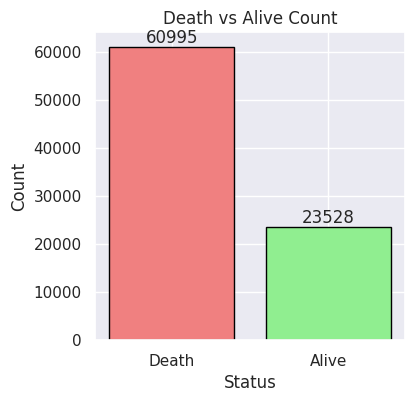

In [64]:
count = inpatient_location_death['death']

# Count the occurrences of each category
value_counts = count.value_counts()

# Create a bar plot
plt.figure(figsize=(4, 4))
bars = plt.bar(['Death', 'Alive'], [value_counts[1], value_counts[0]], edgecolor='black', color=['lightcoral', 'lightgreen'])

# Add count values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, str(height), ha='center', va='bottom')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Death vs Alive Count')
plt.grid(True)  # Add grid lines
plt.show()

### Comparing missing value percentage with 'death_patients' and 'df_grouped'

In [65]:
# Calculate missing values count and percentage for df_grouped
grouped_missing_values_count = df_grouped.isnull().sum()
grouped_missing_percentage = (grouped_missing_values_count / df_grouped.shape[0]) * 100

# Calculate missing values count and percentage for death_patients
death_missing_values_count = death_patients.isnull().sum()
death_missing_percentage = (death_missing_values_count / death_patients.shape[0]) * 100

# Calculate the difference in missing values percentage between grouped data and death patients
missing_percentage_difference = grouped_missing_percentage - death_missing_percentage

# Format the 'Missing Values Count (Grouped Data)' column values with leading zeros
grouped_missing_values_count_formatted = grouped_missing_values_count.map('{:04d}'.format)

# Create a DataFrame for the missing values summary
missing_data_summary = pd.DataFrame({
    'Missing Values Count (Grouped Data)': grouped_missing_values_count_formatted,
    'Missing Values Percentage (Grouped Data)': grouped_missing_percentage.map('{:.2f}%'.format),
    'Missing Values Count (Death Patients)': death_missing_values_count,
    'Missing Values Percentage (Death Patients)': death_missing_percentage.map('{:.2f}%'.format),
    'Difference in Missing Values Percentage': missing_percentage_difference.map('{:.2f}%'.format)
})

# Sort the DataFrame by the 'Missing Values Percentage (Grouped Data)' column in descending order
missing_data_summary = missing_data_summary.sort_values(
    by='Missing Values Percentage (Grouped Data)',
    ascending=False
)

print("Missing values summary per column (ordered by highest missing percentage):")
missing_data_summary


Missing values summary per column (ordered by highest missing percentage):


,Missing Values Count (Grouped Data),Missing Values Percentage (Grouped Data),Missing Values Count (Death Patients),Missing Values Percentage (Death Patients),Difference in Missing Values Percentage
100.0-109.9_service,84363,99.81%,60853,99.77%,0.04%
20-29.9_service,84366,99.81%,60965,99.95%,-0.14%
30.0-39.9_service,83548,98.85%,60689,99.50%,-0.65%
90.0-99.9_service,79304,93.83%,56332,92.36%,1.47%
40.0-49.9_service,78712,93.12%,58261,95.52%,-2.39%
50.0-59.9_service,63479,75.10%,48676,79.80%,-4.70%
80.0-89.9_service,62592,74.05%,41802,68.53%,5.52%
70.0-79.9_service,48787,57.72%,34520,56.59%,1.13%
60.0-69.9_service,48494,57.37%,38104,62.47%,-5.10%
Internalpatientid,0000,0.00%,0,0.00%,0.00%


In [66]:
# dropping columns that have a large number of missing values.
columns_to_drop = ['100.0-109.9_service', '20-29.9_service', '30.0-39.9_service', '90.0-99.9_service', 
                   '40.0-49.9_service', '50.0-59.9_service']

df_death_patients = death_patients.drop(columns=columns_to_drop)

In [67]:
df_death_patients

,Internalpatientid,Service,60.0-69.9_service,70.0-79.9_service,80.0-89.9_service,death
2,3,"MEDICINE,NHCU",None,MEDICINE,NHCU,1
3,4,MEDICINE,None,None,MEDICINE,1
4,5,"MEDICINE,NON-COUNT",None,"MEDICINE,NON-COUNT",None,1
6,10,NON-COUNT,NON-COUNT,None,None,1
9,15,"MEDICINE,SURGERY,NHCU",SURGERY,None,"MEDICINE,NHCU",1
...,...,...,...,...,...,...
84517,169053,"MEDICINE,PSYCHIATRY,NHCU",None,"MEDICINE,PSYCHIATRY,NHCU","MEDICINE,NHCU",1
84518,169055,MEDICINE,None,None,None,1
84520,169060,"MEDICINE,NON-COUNT",MEDICINE,"MEDICINE,NON-COUNT",None,1
84521,169062,"NHCU,INTERMEDIATE MED,DOMICILIARY,MEDICINE,NON...",None,"NHCU,INTERMEDIATE MED,DOMICILIARY,MEDICINE,NON...",None,1


In [68]:
df_death_patients.describe(include =['object'])

,Service,60.0-69.9_service,70.0-79.9_service,80.0-89.9_service
count,60995,22891,26475,19193
unique,572,339,329,243
top,MEDICINE,MEDICINE,MEDICINE,MEDICINE
freq,15181,6751,8459,6593


## Bivariate analysis for Grouped each column vs death

### 60.0-69.9_service

In [69]:
# Generating descriptive statistics for object columns in df_death_patients dataframe
df_death_patients['60.0-69.9_service'].value_counts().head(20)

MEDICINE                             6751
MEDICINE,SURGERY                     3296
MEDICINE,NON-COUNT,SURGERY           1928
MEDICINE,NON-COUNT                   1896
SURGERY                              1238
MEDICINE,NHCU                         806
NON-COUNT                             637
MEDICINE,SURGERY,NHCU                 437
MEDICINE,NHCU,SURGERY                 390
MEDICINE,NON-COUNT,SURGERY,NHCU       317
NON-COUNT,SURGERY                     308
MEDICINE,NON-COUNT,NHCU               283
MEDICINE,PSYCHIATRY                   257
MEDICINE,INTERMEDIATE MED             239
MEDICINE,NON-COUNT,NHCU,SURGERY       228
PSYCHIATRY                            205
NHCU                                  184
MEDICINE,SURGERY,INTERMEDIATE MED     171
MEDICINE,PSYCHIATRY,SURGERY           158
MEDICINE,PSYCHIATRY,NON-COUNT         135
Name: 60.0-69.9_service, dtype: int64

### 70.0-79.9_service

In [70]:
df_death_patients['70.0-79.9_service'].value_counts().head(20)

MEDICINE                               8459
MEDICINE,SURGERY                       3423
MEDICINE,NON-COUNT                     2493
MEDICINE,NON-COUNT,SURGERY             1853
MEDICINE,NHCU                          1305
SURGERY                                1154
NON-COUNT                               616
MEDICINE,SURGERY,NHCU                   529
MEDICINE,NHCU,SURGERY                   491
MEDICINE,INTERMEDIATE MED               457
NHCU                                    449
MEDICINE,NON-COUNT,NHCU                 447
MEDICINE,NON-COUNT,SURGERY,NHCU         359
NON-COUNT,SURGERY                       320
MEDICINE,NON-COUNT,NHCU,SURGERY         266
MEDICINE,SURGERY,INTERMEDIATE MED       254
MEDICINE,PSYCHIATRY                     236
MEDICINE,NHCU,INTERMEDIATE MED          151
MEDICINE,NON-COUNT,INTERMEDIATE MED     138
REHAB MEDICINE,MEDICINE,SURGERY         138
Name: 70.0-79.9_service, dtype: int64

### 80.0-89.9_service

In [71]:
df_death_patients['80.0-89.9_service'].value_counts().head(20)

MEDICINE                                       6593
MEDICINE,SURGERY                               1983
MEDICINE,NON-COUNT                             1874
MEDICINE,NHCU                                  1651
MEDICINE,NON-COUNT,SURGERY                     1110
NHCU                                            632
SURGERY                                         501
MEDICINE,NON-COUNT,NHCU                         459
MEDICINE,SURGERY,NHCU                           412
NON-COUNT                                       395
MEDICINE,NHCU,SURGERY                           379
MEDICINE,INTERMEDIATE MED                       329
MEDICINE,NON-COUNT,SURGERY,NHCU                 238
MEDICINE,NON-COUNT,NHCU,SURGERY                 201
MEDICINE,NHCU,INTERMEDIATE MED                  146
MEDICINE,SURGERY,INTERMEDIATE MED               146
NON-COUNT,SURGERY                               106
MEDICINE,PSYCHIATRY                              99
MEDICINE,NON-COUNT,SURGERY,INTERMEDIATE MED      85
MEDICINE,NON

**Medicine (MEDICINE): The most common service recorded in the death reason is Medicine.**

### Bivariate analysis for whole data service column vs death

In [72]:
dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'inpatient_location_train.csv')])

In [73]:
df_service = dataset.to_pandas_dataframe()

In [76]:
# Drop the specified columns from the DataFrame
df_service.drop(['Column1','Location start date','Location end date','Died at location','State'], axis=1,inplace=True)

In [77]:
df_service

,Internalpatientid,Age at location,Service
0,100005,66.405085,MEDICINE
1,100008,70.233217,SURGERY
2,100015,55.357221,MEDICINE
3,100015,55.684944,MEDICINE
4,100020,60.574319,SURGERY
...,...,...,...
850032,99974,53.408299,MEDICINE
850033,99981,67.291975,SURGERY
850034,99983,44.180472,DOMICILIARY
850035,9999,60.575799,SURGERY


In [78]:
dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'death_train.csv')])

In [81]:
death_df = dataset.to_pandas_dataframe()

In [82]:
# Assigning a value of 1 to a new column 'death' in df_death dataframe
death_df['death'] = 1
death_df.head()

,Column1,Internalpatientid,Age at death,Death date,death
0,0,100036,72.412770,2015-01-18 20:49:10,1
1,1,100037,75.241135,2008-10-16 15:14:26,1
2,2,100045,85.399403,2019-01-26 11:33:52,1
3,3,100095,84.136551,2004-08-10 21:49:35,1
4,6,10013,68.372126,2007-06-11 00:17:06,1


In [85]:
# Dropping the specified columns from df_death dataframe
death_df= death_df.drop(['Column1', 'Age at death', 'Death date'],axis=1)

In [86]:
# merging Inpatient Location grouped columns and death file with Left join on using Internalpatientid
service_death = pd.merge(df_service, death_df, how='left',on='Internalpatientid')

In [87]:
service_death 

,Internalpatientid,Age at location,Service,death
0,100005,66.405085,MEDICINE,1.0
1,100008,70.233217,SURGERY,NaN
2,100015,55.357221,MEDICINE,1.0
3,100015,55.684944,MEDICINE,1.0
4,100020,60.574319,SURGERY,NaN
...,...,...,...,...
850032,99974,53.408299,MEDICINE,1.0
850033,99981,67.291975,SURGERY,NaN
850034,99983,44.180472,DOMICILIARY,NaN
850035,9999,60.575799,SURGERY,NaN


In [88]:
# To handle NaN values in the Death column and indicate that the corresponding persons are alive fill with 0
service_death['death'] = service_death['death'].fillna(0).astype(int)

In [89]:
# Filter the dataset for rows where the 'death' column is 0 (not death)
data_alive = service_death[service_death['death']==0]
data_alive

,Internalpatientid,Age at location,Service,death
1,100008,70.233217,SURGERY,0
4,100020,60.574319,SURGERY,0
36,100077,85.961089,SURGERY,0
39,100097,47.809450,NON-COUNT,0
48,100131,58.793670,MEDICINE,0
...,...,...,...,...
850014,99904,82.110229,NON-COUNT,0
850024,9993,64.307794,MEDICINE,0
850033,99981,67.291975,SURGERY,0
850034,99983,44.180472,DOMICILIARY,0


In [90]:
# Extracting death patients from the dataset
data_death = service_death[service_death['death']==1]
data_death

,Internalpatientid,Age at location,Service,death
0,100005,66.405085,MEDICINE,1
2,100015,55.357221,MEDICINE,1
3,100015,55.684944,MEDICINE,1
5,100026,61.115022,MEDICINE,1
6,100029,81.045343,SURGERY,1
...,...,...,...,...
850029,99965,93.426987,(Censored),1
850030,99973,58.467499,MEDICINE,1
850031,99974,52.396003,MEDICINE,1
850032,99974,53.408299,MEDICINE,1


In [91]:
# Calculate count and percentage for each service
service_counts = data_death['Service'].value_counts()
service_percentages = (service_counts / len(df)) * 100

# Create a DataFrame for the count and percentage summary
service_summary = pd.DataFrame({
    'Service': service_counts.index,
    'Count': service_counts,
    'Percentage': service_percentages.map('{:.2f}%'.format)
})

# Sort the DataFrame by count in descending order
service_summary = service_summary.sort_values('Count', ascending=False)

print("Service Count and Percentage Summary:")
service_summary


Service Count and Percentage Summary:


,Service,Count,Percentage
MEDICINE,MEDICINE,380280,44.74%
SURGERY,SURGERY,94574,11.13%
NHCU,NHCU,64829,7.63%
NON-COUNT,NON-COUNT,46259,5.44%
PSYCHIATRY,PSYCHIATRY,20209,2.38%
DOMICILIARY,DOMICILIARY,17392,2.05%
INTERMEDIATE MED,INTERMEDIATE MED,8572,1.01%
SPINAL CORD INJURY,SPINAL CORD INJURY,4242,0.50%
NEUROLOGY,NEUROLOGY,2728,0.32%
REHAB MEDICINE,REHAB MEDICINE,2631,0.31%


- MEDICINE is the most common service, accounting for 44.74% of the patients. It indicates a significant proportion of patients received medical treatment during their stay.

- SURGERY is the second most common service, with a count of 94574 patients, representing 11.13% of the dataset. This suggests a substantial number of patients underwent surgical procedures.

- NON-COUNT and NHCU (Non-Count Medicine and Non-Count Surgery, respectively) are the next prominent services, accounting for 7.63% and 5.44% of the patients, respectively. These categories might involve specialized or specific types of medical care.

- PSYCHIATRY, DOMICILIARY, and INTERMEDIATE MED are other notable services, representing 2.38%, 2.05%, and 1.01% of the patients, respectively. These services indicate the involvement of psychiatric care, home-based care, and intermediate medical care.

- SPINAL CORD INJURY, REHAB MEDICINE, NEUROLOGY, and BLIND REHAB are less frequent services, each representing less than 1% of the patients. These services likely cater to patients with specific conditions or specialized rehabilitation needs.

- (Censored), Not specified, and Not specified (no value) categories have relatively low counts, indicating a small percentage of patients falling under these service classifications.

---

# Important!

# Data Preparation

In [16]:
# changing variable name for dataframe
inpatient_location = df

### Sort the dataset based on the patientid and 'age' column in ascending order

In [17]:
# Sort the dataset based on the patientid and 'age' column in ascending order
inpatient_location.sort_values(["Internalpatientid","Age at location"],inplace=True)

In [18]:
inpatient_location

,Internalpatientid,Age at location,Location start date,Location end date,Service,Died at location,State
4749,1,67.676524,2011-12-10 18:28:02,2011-12-14 18:23:17,MEDICINE,False,Indiana
44754,1,68.344672,2012-08-10 23:27:47,2012-08-14 20:57:06,MEDICINE,False,Indiana
33360,1,72.272607,2016-07-16 15:18:16,2016-07-22 21:36:24,SURGERY,False,Indiana
50305,1,78.725684,2022-12-31 05:41:51,2023-01-01 23:06:30,MEDICINE,False,Indiana
405630,2,55.027326,2009-09-30 11:42:00,2009-09-30 21:47:05,MEDICINE,False,Texas
...,...,...,...,...,...,...,...
524186,169064,81.672049,2008-08-19 03:12:47,2008-08-19 06:26:50,SURGERY,False,Wyoming
414291,169064,81.672409,2008-08-19 06:22:03,2008-08-20 05:19:33,SURGERY,False,Wyoming
346082,169064,81.675037,2008-08-20 05:25:18,2008-08-21 18:07:02,SURGERY,False,Wyoming
330723,169064,81.679202,2008-08-21 17:57:27,2008-08-24 04:32:28,SURGERY,False,Wyoming


In [19]:
inpatient_location.nunique()

Internalpatientid       84523
Age at location        849782
Location start date    837708
Location end date      829432
Service                    14
Died at location            2
State                      50
dtype: int64

In [20]:
# Drop the specified columns from the DataFrame
inpatient_location.drop(['Location end date','Location start date','Died at location','State'], axis=1,inplace=True)

### Checking missing values for Potential Attributes

In [21]:
# Count the number of missing values in each column
inpatient_location.isnull().sum()

Internalpatientid    0
Age at location      0
Service              0
dtype: int64

### Getting digits values

In [22]:
# Sort the dataset based on the 'Internalpatientid' and 'Age at measurement' columns
inpatient_location.sort_values(["Internalpatientid", "Age at location"], inplace=True)

# Format 'Age at measurement' values in the format 00.00
inpatient_location["Age at location"] = inpatient_location["Age at location"].map("{:.2f}".format)

# Print the updated DataFrame
inpatient_location

,Internalpatientid,Age at location,Service
4749,1,67.68,MEDICINE
44754,1,68.34,MEDICINE
33360,1,72.27,SURGERY
50305,1,78.73,MEDICINE
405630,2,55.03,MEDICINE
...,...,...,...
524186,169064,81.67,SURGERY
414291,169064,81.67,SURGERY
346082,169064,81.68,SURGERY
330723,169064,81.68,SURGERY


### Getting only maximum ages of PID

In [23]:
# Find the maximum age for each internal patient id
max_ages = inpatient_location.groupby('Internalpatientid')['Age at location'].max().reset_index()

# Merge with the original dataframe to get the rows with the highest age
inpatient_location = pd.merge(inpatient_location, max_ages, on =['Internalpatientid','Age at location'], how = 'inner')

inpatient_location

,Internalpatientid,Age at location,Service
0,1,78.73,MEDICINE
1,2,68.97,NHCU
2,3,81.64,NHCU
3,4,84.18,MEDICINE
4,5,76.50,MEDICINE
...,...,...,...
104158,169057,85.80,MEDICINE
104159,169060,71.29,MEDICINE
104160,169060,71.29,MEDICINE
104161,169062,74.14,INTERMEDIATE MED


### Round off the age

In [24]:
# Convert 'Age at measurement' column from object to float
inpatient_location["Age at location"] = inpatient_location["Age at location"].astype(float)

In [25]:
inpatient_location['Age at location'] = inpatient_location['Age at location'].round()

In [26]:
inpatient_location['Age at location'] = inpatient_location['Age at location'].astype('int')

In [27]:
inpatient_location

,Internalpatientid,Age at location,Service
0,1,79,MEDICINE
1,2,69,NHCU
2,3,82,NHCU
3,4,84,MEDICINE
4,5,76,MEDICINE
...,...,...,...
104158,169057,86,MEDICINE
104159,169060,71,MEDICINE
104160,169060,71,MEDICINE
104161,169062,74,INTERMEDIATE MED


In [28]:
inpatient_location['Internalpatientid'].nunique()

84523

In [29]:
inpatient_location.describe(include=['object'])

,Service
count,104163
unique,14
top,MEDICINE
freq,65323


### Value Count Checking

In [30]:
inpatient_location_value_counts = inpatient_location['Internalpatientid'].value_counts().to_frame()

In [31]:
inpatient_location_value_counts = inpatient_location_value_counts.reset_index()

In [32]:
inpatient_location_value_counts.columns=['Internalpatientid','counts for inpatient location']

In [33]:
inpatient_location_value_counts

,Internalpatientid,counts for inpatient location
0,151104,7
1,64565,6
2,4935,6
3,81098,6
4,141261,6
...,...,...
84518,158501,1
84519,29478,1
84520,131880,1
84521,2857,1


In [34]:
import os
cwd = os.getcwd()
cwd

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/2211574'

In [35]:
#df.to_csv('Path where you want to store the exported CSV file/File Name.csv')
inpatient_location_value_counts.to_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Counts/train_2_digit_df_Count_inpatient_location.csv')

### Creating a new column 

In [36]:
# To create a new column
inpatient_location['inpatient_location_Service'] = inpatient_location['Age at location'].astype(str) + '_' + inpatient_location['Service'].astype(str)

In [37]:
inpatient_location

,Internalpatientid,Age at location,Service,inpatient_location_Service
0,1,79,MEDICINE,79_MEDICINE
1,2,69,NHCU,69_NHCU
2,3,82,NHCU,82_NHCU
3,4,84,MEDICINE,84_MEDICINE
4,5,76,MEDICINE,76_MEDICINE
...,...,...,...,...
104158,169057,86,MEDICINE,86_MEDICINE
104159,169060,71,MEDICINE,71_MEDICINE
104160,169060,71,MEDICINE,71_MEDICINE
104161,169062,74,INTERMEDIATE MED,74_INTERMEDIATE MED


### Drop Columns

In [38]:
# Drop the specified columns from the DataFrame
inpatient_location.drop(['Age at location','Service'], axis=1,inplace=True)

### Group the DataFrame by 'Internalpatientid'

In [39]:
# Group the DataFrame by 'Internalpatientid' and concatenate the icd10 values and
#The purpose of `x.dropna()` is to remove any missing values from the Series before applying a subsequent operation,
# such as concatenation using the `join` function. By dropping the missing values,
#we ensure that only non-null values are included in the resulting concatenated string.

df_grouped = inpatient_location.groupby('Internalpatientid').agg(lambda x: ','.join(x.dropna()))
df_grouped 

# Reset the index of the grouped DataFrame
inpatient_location_df_grouped = df_grouped.reset_index()
inpatient_location_df_grouped

,Internalpatientid,inpatient_location_Service
0,1,79_MEDICINE
1,2,69_NHCU
2,3,82_NHCU
3,4,84_MEDICINE
4,5,76_MEDICINE
...,...,...
84518,169055,59_MEDICINE
84519,169057,86_MEDICINE
84520,169060,"71_MEDICINE,71_MEDICINE"
84521,169062,74_INTERMEDIATE MED


In [40]:
# Get the number of unique values in the 'Internalpatientid' column
print("Unique df_grouped Internalpatientid")
inpatient_location_df_grouped.nunique()

Unique df_grouped Internalpatientid


Internalpatientid             84523
inpatient_location_Service     2962
dtype: int64

### Checking row values if it is correctly printed

In [41]:
# Checking row values if it is correctly printed like A, B, C...
column_value = inpatient_location_df_grouped['inpatient_location_Service'].values[0]
print(column_value)

79_MEDICINE


In [42]:
# Checking all row values of 'Internalpatientid']==169060
inpatient_location_df_grouped[inpatient_location_df_grouped['Internalpatientid']==147404]

,Internalpatientid,inpatient_location_Service
73743,147404,"61_MEDICINE,61_MEDICINE,61_MEDICINE,61_MEDICIN..."


# Saving File

In [47]:
import os
cwd = os.getcwd()
cwd

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/2211574'

In [45]:
inpatient_location_df_grouped.to_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/team3-lavanya-gpu2/code/Users/900379/Output_files_train/df_inpatient_location_train.csv')

---

## Observations

### 1. **Data type:**
- The 'Internalpatientid' column contains integers and the columns for 'Age at location' in float format, while the rest of the features are in object format.

Shape of the data
- Number of rows: 850037
- Number of columns: 8
- Number of Unique Patientid: 84523
---


### 2. **Missing Values:**

-  The dataset has some missing values in ‘Location end date’.

---     
     
### 3. **Numerical Data Analysis:** 

**Age at location**   
- Count: 522740.0
- Mean age: 69.18
- Minimum Age: 20.40
- Maximum ge: 109.22
- Outlier age range: Between (20 - 36 and 102 - 109)
---

### 4. **Object Data Analysis:** 

- **Service:** 
  - This column describes the type of medical service or department the patient received care from. It provides information about the specific area of healthcare the patient was involved with, such as Medicine, Surgery, NHCU (which may refer to a specific unit or department), etc. 
  - There were 14 different admitting unit services and different discharging unit services. 
   - The most common service was Medicine (477243 occurrences).

- **Died at location:** 
    - The total records, 12,230 patients have the value "Yes" in the "Died at location" column, while the majority of the patients, 837,807 in total, have the value "No".
   
- **State:** 
    - The majority of patients were from California, with a total of 74484 patients. The dataset also includes a breakdown of patients by state. 

---

### **Compare Inpatient Admission and Inpatient Location dataset’s ‘Service’ related column:**

**Example 1:** Internalpatientid = 10469
- **Dataset 1:** Inpatient Admission
     - Age at admission - 52.55060435 - 67.52463929
     - Admitting unit Service - MEDICINE, NEUROLOGY, PSYCHIATRY
     - Discharging unit Service - MEDICINE, NEUROLOGY, PSYCHIATRY
     
- **Dataset 2:** Inpatient Location
     - Age at location - 52.55060435 - 67.52463929
     - Service - MEDICINE, PSYCHIATRY, NEUROLOGY

**Example 2:** Internalpatientid = 168008
- **Dataset 1:** Inpatient Admission
     - Age at admission - 70.87471934 - 73.33307126
     - Admitting unit Service- MEDICINE, SURGERY, NON-COUNT, NHCU
     - Discharging unit Service- MEDICINE, SURGERY, NON-COUNT, NHCU

- **Dataset 2:** Inpatient Location
   - Age at location - 70.87471934 - 73.33307126
   - Service - MEDICINE, SURGERY, NON-COUNT, NHCU

I have examined over 20 unique patient records in this study. Consequently, it has been observed that both the Inpatient Admission and Inpatient Location datasets contain identical values in the Service column for the patients.

### Bivariate Analysis: Service vs Death
- **MEDICINE** is the most common service, accounting for 44.74% of the patients. It indicates a significant proportion of patients received medical treatment during their stay.

- **SURGERY** is the second most common service, with a count of 94574 patients, representing 11.13% of the dataset. This suggests a substantial number of patients underwent surgical procedures.

**Note: Bucketing has been done for this dataset for these columns “Age based on Service”**

---
